<a href="https://colab.research.google.com/github/natdebandi/text_mining_unrn/blob/main/n_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEXT MINING

UNRN

Especialización en ciencias de datos aplicada

Natalia Debandi

ndebandi@unrn.edu.ar

**CLASE 2**

extraccion de N-gramas

In [1]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re



In [2]:
# Descargar recursos de NLTK (solo primera vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
def preprocesar_texto(texto, lang='spanish'):
    """
    Limpia y prepara el texto para análisis:
    1. Convertir a minúsculas
    2. Eliminar puntuación
    3. Tokenizar
    4. Eliminar stopwords
    5. Lematizar
    """
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números y caracteres especiales
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar
    tokens = word_tokenize(texto, language=lang)

    # Eliminar stopwords
    stop_words = set(stopwords.words(lang))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [4]:
# Texto de ejemplo
texto_ejemplo = """
El aprendizaje automático es una rama de la inteligencia artificial que se centra en el desarrollo
de algoritmos que pueden aprender patrones a partir de datos. Los modelos de aprendizaje automático
se entrenan con grandes conjuntos de datos para realizar predicciones o tomar decisiones.
La calidad de los datos es fundamental para el éxito de cualquier proyecto de machine learning.
En la actualidad, el deep learning ha revolucionado muchos campos como el procesamiento de lenguaje
natural, la visión por computadora y el reconocimiento de voz.
"""

# Preprocesar el texto
tokens = preprocesar_texto(texto_ejemplo, 'spanish')
print("Tokens preprocesados:", tokens[:10])  # Mostrar primeros 10 tokens

Tokens preprocesados: ['aprendizaje', 'automático', 'rama', 'inteligencia', 'artificial', 'centrum', 'desarrollo', 'algoritmos', 'pueden', 'aprender']


In [5]:
def extraer_ngramas(tokens, n=2, top_n=10):
    """
    Extrae los n-gramas más frecuentes de una lista de tokens

    Args:
        tokens (list): Lista de tokens preprocesados
        n (int): Tipo de n-grama (1=unigramas, 2=bigramas, etc.)
        top_n (int): Número de n-gramas a devolver

    Returns:
        DataFrame con los n-gramas más frecuentes
    """
    # Generar n-gramas
    n_gramas = list(ngrams(tokens, n))

    # Contar frecuencias
    frecuencias = Counter(n_gramas)
    mas_comunes = frecuencias.most_common(top_n)

    # Convertir a DataFrame para mejor visualización
    df = pd.DataFrame(mas_comunes, columns=['N-grama', 'Frecuencia'])
    df['N-grama'] = df['N-grama'].apply(lambda x: ' '.join(x))

    return df

<ipython-input-6-8a161e7df78c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unigramas, y='N-grama', x='Frecuencia', palette='viridis')


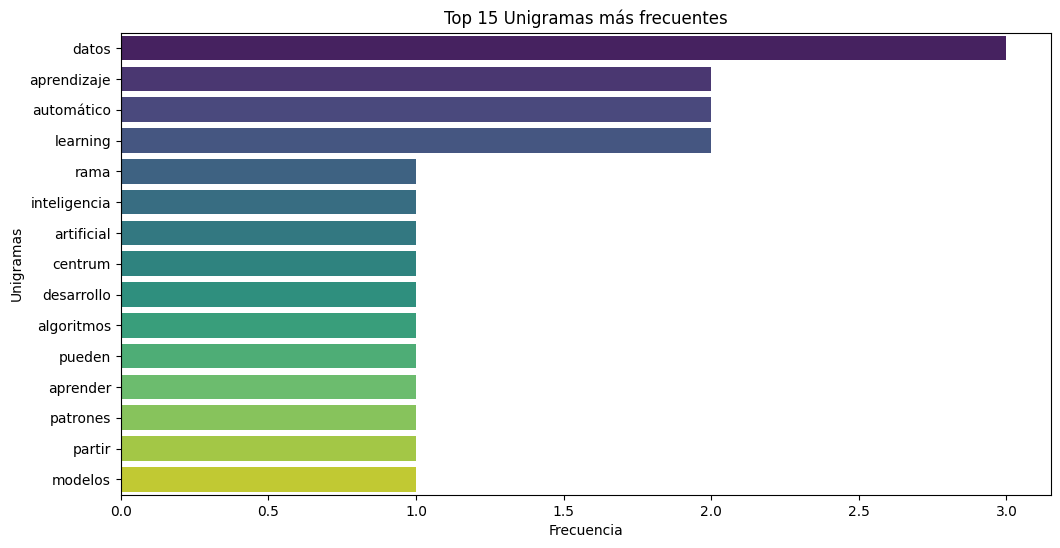

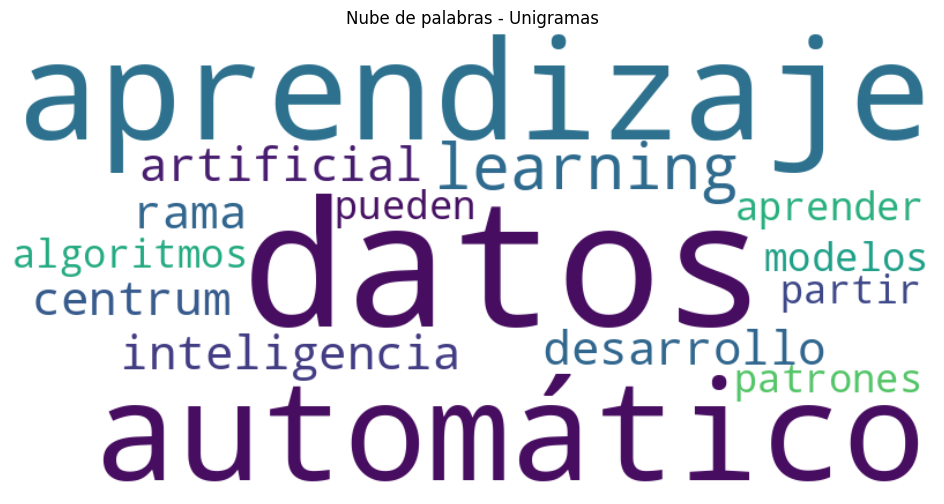

In [6]:
# Extraer unigramas
unigramas = extraer_ngramas(tokens, n=1, top_n=15)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=unigramas, y='N-grama', x='Frecuencia', palette='viridis')
plt.title('Top 15 Unigramas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Unigramas')
plt.show()

# WordCloud de unigramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(unigramas['N-grama'], unigramas['Frecuencia'])))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Unigramas')
plt.show()

<ipython-input-7-9d4faa0dfbc3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigramas, y='N-grama', x='Frecuencia', palette='magma')


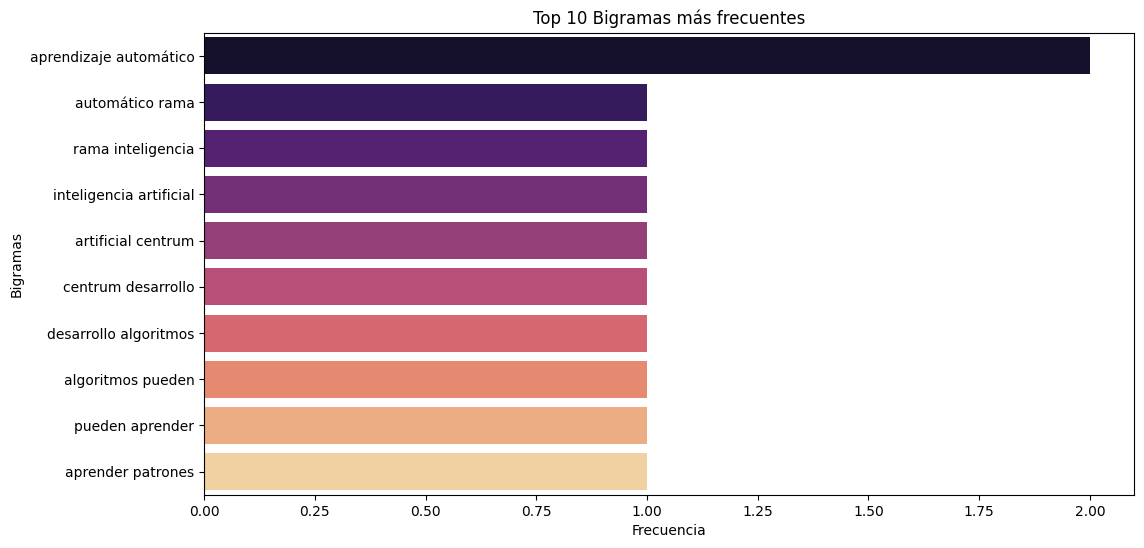

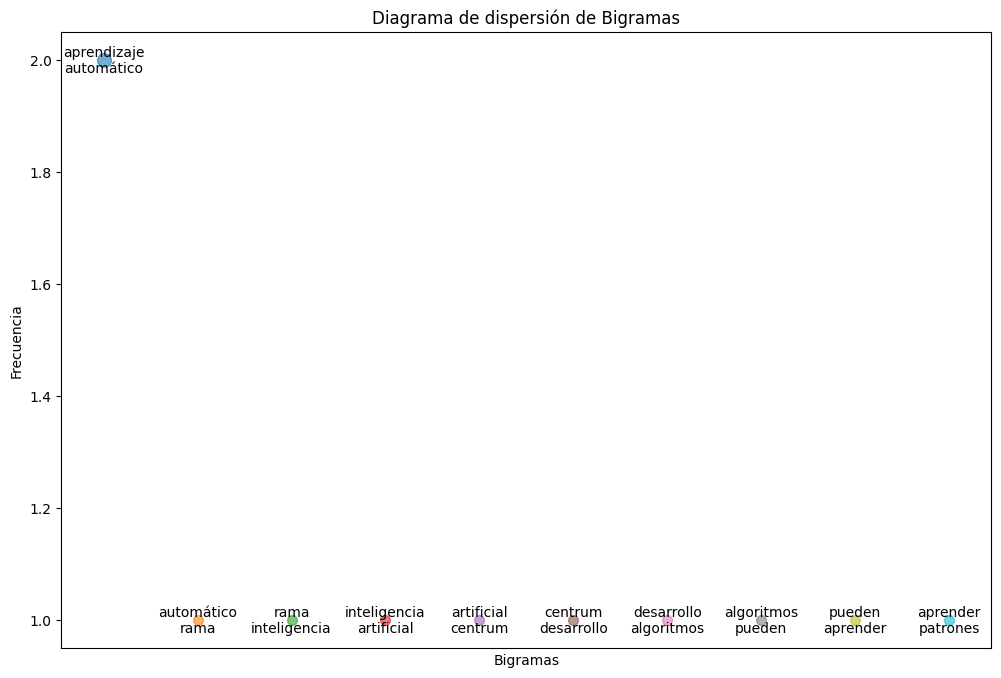

In [7]:
# Extraer bigramas
bigramas = extraer_ngramas(tokens, n=2, top_n=10)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=bigramas, y='N-grama', x='Frecuencia', palette='magma')
plt.title('Top 10 Bigramas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.show()

# Gráfico de red para bigramas
bigram_dict = dict(zip(bigramas['N-grama'], bigramas['Frecuencia']))

plt.figure(figsize=(12, 8))
for i, (bigram, freq) in enumerate(bigram_dict.items()):
    words = bigram.split()
    plt.scatter(i, freq, s=freq*50, alpha=0.6)
    plt.text(i, freq, f"{words[0]}\n{words[1]}", ha='center', va='center')
plt.title('Diagrama de dispersión de Bigramas')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.xticks([])
plt.show()

<ipython-input-8-60e5d475ffdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trigramas, y='N-grama', x='Frecuencia', palette='plasma')


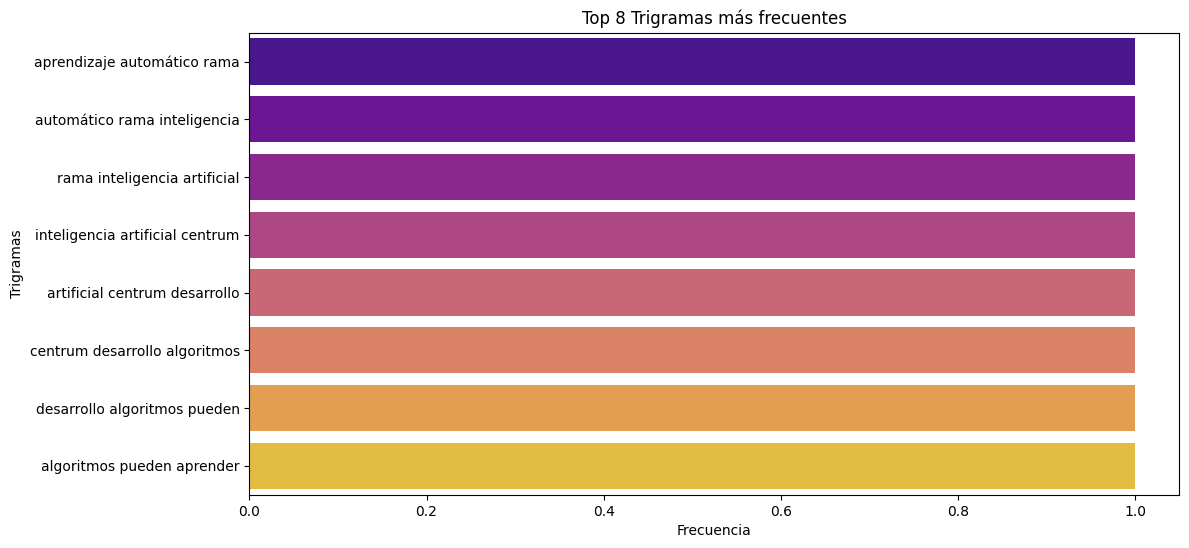

,N-grama,Frecuencia
0,aprendizaje automático rama,1
1,automático rama inteligencia,1
2,rama inteligencia artificial,1
3,inteligencia artificial centrum,1
4,artificial centrum desarrollo,1
5,centrum desarrollo algoritmos,1
6,desarrollo algoritmos pueden,1
7,algoritmos pueden aprender,1


In [8]:
# Extraer trigramas
trigramas = extraer_ngramas(tokens, n=3, top_n=8)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=trigramas, y='N-grama', x='Frecuencia', palette='plasma')
plt.title('Top 8 Trigramas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Trigramas')
plt.show()

# Tabla de trigramas
display(trigramas.style.background_gradient(cmap='Blues'))

<ipython-input-16-9982477f43bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, y='N-grama', x='Frecuencia', ax=axes[n-1], palette='rocket')
<ipython-input-16-9982477f43bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, y='N-grama', x='Frecuencia', ax=axes[n-1], palette='rocket')
<ipython-input-16-9982477f43bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, y='N-grama', x='Frecuencia', ax=axes[n-1], palette='rocket')


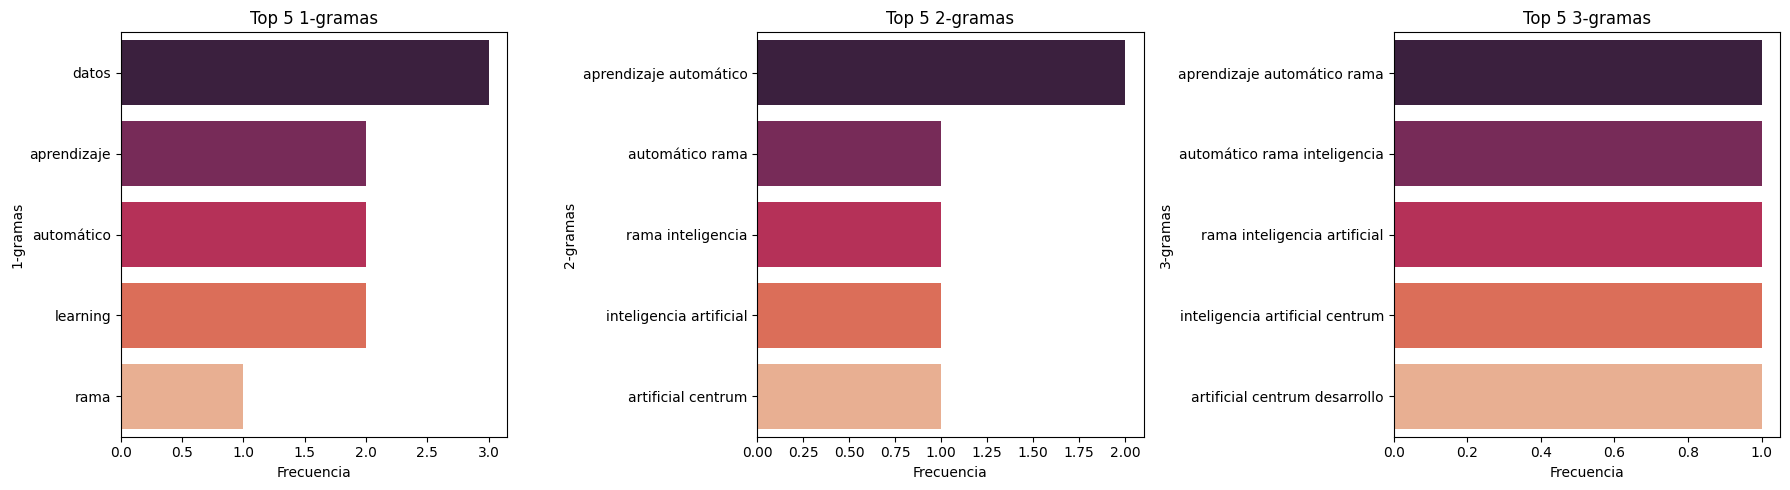

In [ ]:
# Función para comparar diferentes n-gramas
def comparar_ngramas(tokens, max_n=3, top_n=5):
    fig, axes = plt.subplots(1, max_n, figsize=(18, 5))

    for n in range(1, max_n+1):
        ngram_df = extraer_ngramas(tokens, n=n, top_n=top_n)
        sns.barplot(data=ngram_df, y='N-grama', x='Frecuencia', ax=axes[n-1], palette='rocket')
        axes[n-1].set_title(f'Top {top_n} {n}-gramas')
        axes[n-1].set_xlabel('Frecuencia')
        axes[n-1].set_ylabel(f'{n}-gramas')

    plt.tight_layout()
    plt.show()

# Ejecutar comparación
comparar_ngramas(tokens, max_n=3, top_n=5)

Voy a probar con un corpus más grande

https://www.kaggle.com/datasets/andrsmosquera/crticas-pelculas-filmaffinity-en-espaol-netflix/data


In [9]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# CAMBIAR EL LUGAR DEL PATH
# sino pueden  subir el archivo al notebook y usar directamente el nombre
file_path = '/content/drive/MyDrive/4.Clases/Text mining/practica/datasets/film_reviews_result.csv'

data_text = pd.read_csv(file_path, sep='|')
data_text

Mounted at /content/drive


,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Respira (Serie de TV),"Serie de TV, Drama, Medicina","4,6",1,Respira,"Como fan de las series españolas y de Najwa, e..."
1,Respira (Serie de TV),"Serie de TV, Drama, Medicina","4,6",2,Esta serie te llama tonto a la cara,Todo lo malo que puede tener una serie lo pose...
2,Respira (Serie de TV),"Serie de TV, Drama, Medicina","4,6",1,Respira,"La serie es un drama médico que intenta ""copia..."
3,Respira (Serie de TV),"Serie de TV, Drama, Medicina","4,6",1,"Imposible, no hay manera",Nadie te obliga a ver nada que no quieras ver ...
4,Respira (Serie de TV),"Serie de TV, Drama, Medicina","4,6",1,Serie nefasta,Está serie da vergüenza ajena. Una serie donde...
...,...,...,...,...,...,...
10053,"Confiesa, Fletch","Comedia, Crimen","5,3",6,El consuelo del lenguaje,Un misterioso asesinato provoca diversión y de...
10054,"Confiesa, Fletch","Comedia, Crimen","5,3",4,Otra historia arruinada por el wokismo.,"Empieza bien, pero va perdiendo fuerza y coher..."
10055,Pesadillas y ensoñaciones: El huérfano (TV),"Terror, Sobrenatural, Adopción, Pobreza, Episo...","4,8",4,La gallina de los huevos de oro,"Segunda entrega de la serie ""Pesadillas y enso..."
10056,Pesadillas y ensoñaciones: La vieja casa (TV),"Terror, Sobrenatural, Episodio de TV","5,1",5,"Casa vieja, historia vieja",Con Old House comienza la serie de siete episo...


In [10]:
#tomo una muestra
textos = data_text['review_text'].sample(n=50).values



<ipython-input-11-f47233ae0f18>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigramas_corpus, y='N-grama', x='Frecuencia', palette='coolwarm')


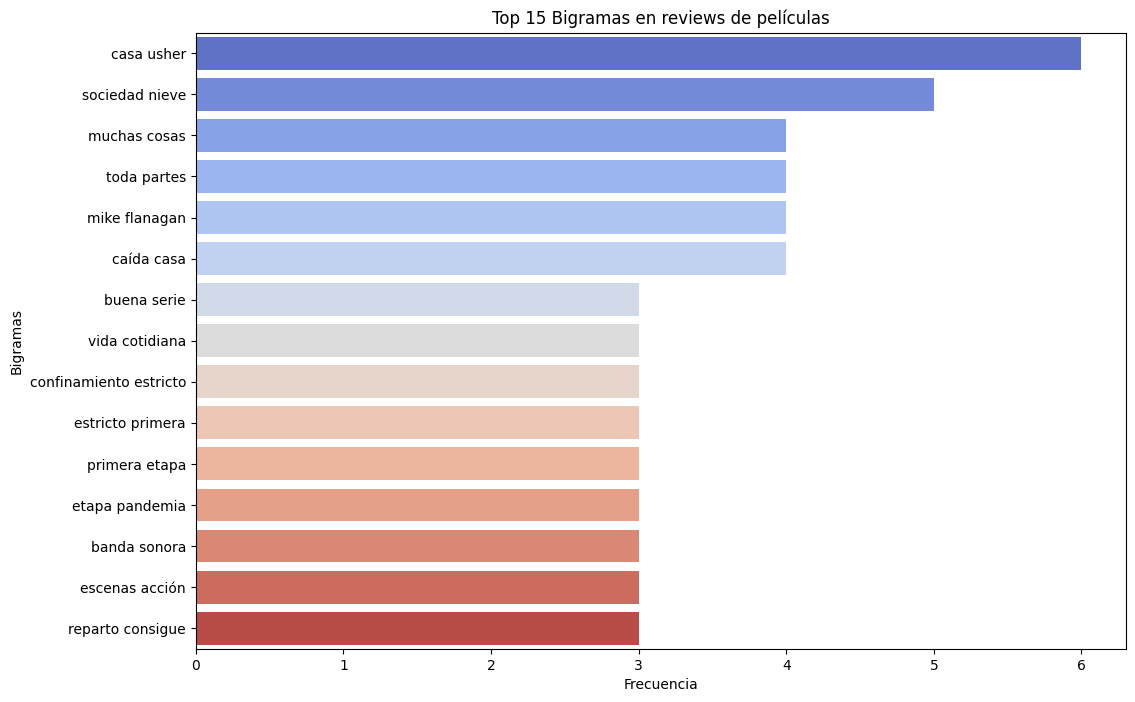

In [11]:

#Esto es para trabajar con unos textos médicos.
# Cargar un dataset más grande para análisis (opcional)
#from sklearn.datasets import fetch_20newsgroups

# Descargar datos de ejemplo (categoría 'sci.med')
#newsgroups = fetch_20newsgroups(subset='train', categories=['sci.med'])
#textos = newsgroups.data[:50]  # Tomar solo 50 documentos para el ejemplo

# Preprocesar todos los textos
tokens_corpus = []
for texto in textos:
    tokens_corpus.extend(preprocesar_texto(texto, 'spanish'))  # Cambiar a 'spanish' para español

# Analizar bigramas en el corpus más grande
bigramas_corpus = extraer_ngramas(tokens_corpus, n=2, top_n=15)

# Visualización
plt.figure(figsize=(12, 8))
sns.barplot(data=bigramas_corpus, y='N-grama', x='Frecuencia', palette='coolwarm')
plt.title('Top 15 Bigramas en reviews de películas')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.show()